在softmax.ipynb中，我们使用的全连接层无法保留输入数据的空间结构信息（如图像中的局部相关性），因此在处理图像等数据时效率较低。因为每个神经元与前一层的所有神经元相连，参数数量通常非常多。这导致计算和存储的需求很高，特别是在处理高维输入时。<br>

而卷积层则有以下特点：<br>
参数共享：同一个卷积核在输入的不同位置进行卷积操作，参数共享显著减少了参数数量。<br>
局部连接：卷积核只对输入的局部区域进行操作，这保留了输入数据的空间结构信息。<br>
平移不变性：卷积操作具有平移不变性，这意味着如果输入发生小的平移，输出仍然能够保留重要特征。<br>

	



[1,  300]loss:0.626
[1,  600]loss:0.210
[1,  900]loss:0.151
Accuracy on test set: 96.870000 %
[2,  300]loss:0.113
[2,  600]loss:0.102
[2,  900]loss:0.096
Accuracy on test set: 97.750000 %
[3,  300]loss:0.081
[3,  600]loss:0.077
[3,  900]loss:0.075
Accuracy on test set: 97.820000 %
[4,  300]loss:0.072
[4,  600]loss:0.059
[4,  900]loss:0.063
Accuracy on test set: 98.420000 %
[5,  300]loss:0.061
[5,  600]loss:0.054
[5,  900]loss:0.055
Accuracy on test set: 98.420000 %
[6,  300]loss:0.055
[6,  600]loss:0.050
[6,  900]loss:0.046
Accuracy on test set: 98.560000 %
[7,  300]loss:0.045
[7,  600]loss:0.046
[7,  900]loss:0.047
Accuracy on test set: 98.610000 %
[8,  300]loss:0.040
[8,  600]loss:0.046
[8,  900]loss:0.042
Accuracy on test set: 98.680000 %
[9,  300]loss:0.037
[9,  600]loss:0.044
[9,  900]loss:0.036
Accuracy on test set: 98.580000 %
[10,  300]loss:0.035
[10,  600]loss:0.037
[10,  900]loss:0.037
Accuracy on test set: 98.520000 %


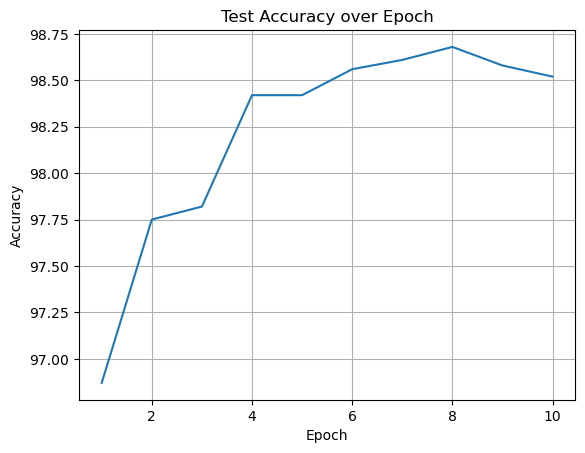

In [7]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

#Prepare Dataset
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

train_dataset = datasets.MNIST(root='./dataset/mnist/',
                               train=True,
                               download=True,
                               transform=transform
                               )
train_loader = DataLoader(train_dataset,
                          shuffle = True,
                          batch_size = batch_size
                          )
test_dataset = datasets.MNIST(root= './dataset/mnist/',
                              train = False,
                              transform= transform
                              )
test_loader = DataLoader(test_dataset,
                         shuffle = False,
                         batch_size = batch_size
                         )

#Dessign a model

class NET (torch.nn.Module):
    def __init__(self):
        super(NET,self).__init__()
        self.conv1 = torch.nn.Conv2d(1,10,kernel_size = 5)
        self.conv2 = torch.nn.Conv2d(10,20,kernel_size = 5)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320,10)

    def forward(self,x):
        batch_size = x.size(0)
        x = self.pooling(F.relu(self.conv1(x)))
        x = self.pooling(F.relu(self.conv2(x)))
        #在 PyTorch 中，view 函数用于改变张量的形状。参数中的 -1 是一种简便的写法，用于自动推断这个维度的大小。
        x = x.view(batch_size,-1)
        x = self.fc(x)
        return x
model = NET()

#Construct Loss and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01, momentum = 0.5)

#train and test

def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader,0):
        inputs,target = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx%300 == 299:
            print('[%d,%5d]loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss = 0.0

def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            outputs = model(images)
            _,predicted = torch.max(outputs.data,dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuracy = 100*correct/total
    print('Accuracy on test set: %f %%' % (accuracy))
    return accuracy

#excute
num_epochs = 10
accuracy_value = []
for epoch in range(num_epochs):
    train (epoch)
    accuracy = test()
    accuracy_value.append(accuracy)

plt.plot(range(1,num_epochs+1),accuracy_value)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epoch')
plt.grid(True)
plt.show()

现在我们将这个model的层数增加，看看会有什么不同的效果。

[1,  300]loss:0.871
[1,  600]loss:0.189
[1,  900]loss:0.141
Accuracy on test set: 96.480000 %
[2,  300]loss:0.106
[2,  600]loss:0.097
[2,  900]loss:0.086
Accuracy on test set: 97.620000 %
[3,  300]loss:0.075
[3,  600]loss:0.067
[3,  900]loss:0.063
Accuracy on test set: 98.040000 %
[4,  300]loss:0.056
[4,  600]loss:0.054
[4,  900]loss:0.054
Accuracy on test set: 98.450000 %
[5,  300]loss:0.046
[5,  600]loss:0.048
[5,  900]loss:0.045
Accuracy on test set: 98.720000 %
[6,  300]loss:0.039
[6,  600]loss:0.038
[6,  900]loss:0.041
Accuracy on test set: 98.840000 %
[7,  300]loss:0.032
[7,  600]loss:0.036
[7,  900]loss:0.040
Accuracy on test set: 99.010000 %
[8,  300]loss:0.028
[8,  600]loss:0.030
[8,  900]loss:0.034
Accuracy on test set: 98.880000 %
[9,  300]loss:0.027
[9,  600]loss:0.028
[9,  900]loss:0.027
Accuracy on test set: 98.780000 %
[10,  300]loss:0.024
[10,  600]loss:0.027
[10,  900]loss:0.024
Accuracy on test set: 98.890000 %


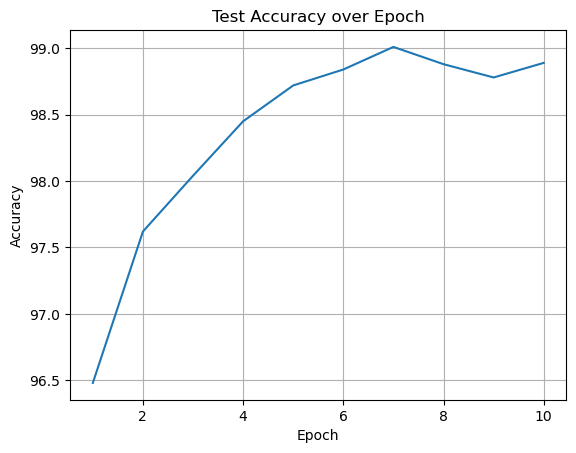

In [8]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

#Prepare Dataset
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

train_dataset = datasets.MNIST(root='./dataset/mnist/',
                               train=True,
                               download=True,
                               transform=transform
                               )
train_loader = DataLoader(train_dataset,
                          shuffle = True,
                          batch_size = batch_size
                          )
test_dataset = datasets.MNIST(root= './dataset/mnist/',
                              train = False,
                              transform= transform
                              )
test_loader = DataLoader(test_dataset,
                         shuffle = False,
                         batch_size = batch_size
                         )

#Dessign a model

class NET (torch.nn.Module):
    def __init__(self):
        super(NET,self).__init__()
        self.conv1 = torch.nn.Conv2d(1,10,kernel_size = 5,padding=1,stride=1)
        self.conv2 = torch.nn.Conv2d(10,20,kernel_size = 4,padding=1,stride=1)
        self.conv3 = torch.nn.Conv2d(20,40,kernel_size = 5,padding=1,stride=1)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(160,10)

    def forward(self,x):
        batch_size = x.size(0)
        x = self.pooling(F.relu(self.conv1(x)))
        x = self.pooling(F.relu(self.conv2(x)))
        x = self.pooling(F.relu(self.conv3(x)))
        #在 PyTorch 中，view 函数用于改变张量的形状。参数中的 -1 是一种简便的写法，用于自动推断这个维度的大小。
        x = x.view(batch_size,-1)
        x = self.fc(x)
        return x
model = NET()

#Construct Loss and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01, momentum = 0.5)

#train and test

def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader,0):
        inputs,target = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx%300 == 299:
            print('[%d,%5d]loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss = 0.0

def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            outputs = model(images)
            _,predicted = torch.max(outputs.data,dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuracy = 100*correct/total
    print('Accuracy on test set: %f %%' % (accuracy))
    return accuracy

#excute
num_epochs = 10
accuracy_value = []
for epoch in range(num_epochs):
    train (epoch)
    accuracy = test()
    accuracy_value.append(accuracy)

plt.plot(range(1,num_epochs+1),accuracy_value)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epoch')
plt.grid(True)
plt.show()

可以看出，提高层的数量是可以提高模型预测的准确率的，但是相应的训练时间也会随之增加。